In [1]:
# pip install -U kaleido

In [1]:
# Import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions

from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# Load all the data from the  three given csv files for ODI, T20 and test match types

In [2]:
odi_df = pd.read_csv('virat_kohli_odi_innings_data.csv')
print(f'Shape = {odi_df.shape} \n')
odi_df.head()

Shape = (262, 13) 



,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Odi No
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18/08/08,ODI # 2742
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20/08/08,ODI # 2745
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24/08/08,ODI # 2750
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27/08/08,ODI # 2755
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29/08/08,ODI # 2756


In [3]:
t20i_df = pd.read_csv('virat_kohli_t20i_innings_data.csv')
print(f'Shape = {t20i_df.shape} \n')
t20i_df.head()

Shape = (114, 13) 



,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,T20I No
0,26,30,21,3,1,123.8,5,not out,2,v Zimbabwe,Harare,12/06/10,T20I # 182
1,DNB,-,-,-,-,-,-,-,2,v Zimbabwe,Harare,13/06/10,T20I # 183
2,28,28,19,5,0,147.36,1,bowled,1,v South Africa,Durban,09/01/11,T20I # 196
3,14,15,12,2,0,116.66,3,caught,1,v West Indies,Port of Spain,04/06/11,T20I # 200
4,4,5,5,0,0,80,4,caught,1,v England,Manchester,31/08/11,T20I # 204


In [4]:
test_inn_df = pd.read_csv('virat_kohli_test_innings_data.csv')
print(f'Shape = {test_inn_df.shape} \n')
test_inn_df.head()

Shape = (180, 13) 



,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Test No
0,4,13,10,1,0,40,5,caught,1,v West Indies,Kingston,20/06/11,Test # 1997
1,15,72,54,2,0,27.77,5,caught,3,v West Indies,Kingston,20/06/11,Test # 1997
2,0,1,2,0,0,0,5,caught,1,v West Indies,Bridgetown,28/06/11,Test # 1998
3,27,118,107,1,1,25.23,5,caught,3,v West Indies,Bridgetown,28/06/11,Test # 1998
4,30,62,53,2,0,56.6,5,caught,2,v West Indies,Roseau,06/07/11,Test # 1999


## Concatenate runs from all the match type and store in Runs. Similarly do for strike rate and store in SR and Grounds in ground.

In [5]:
def generate_matchtype_column(m_type, entry_count):
  mtype_df = pd.DataFrame([m_type] * entry_count, columns = ['match_type'])
  return mtype_df

In [6]:
runs_combined = odi_df['Runs'].append(t20i_df['Runs'], ignore_index = True)
runs_combined = runs_combined.append(test_inn_df['Runs'], ignore_index = True)
runs_combined

0      12
1      37
2      25
3      54
4      31
       ..
551    45
552    23
553    13
554    11
555    20
Name: Runs, Length: 556, dtype: object

In [7]:
SR_combined = pd.concat([odi_df['SR'], t20i_df['SR'], test_inn_df['SR']], axis = 0, ignore_index = True)
SR_combined

0      54.54
1      55.22
2      65.78
3      81.81
4      67.39
       ...  
551    59.21
552    47.91
553    81.25
554    57.89
555       50
Name: SR, Length: 556, dtype: object

In [8]:
ground_combined = pd.concat([odi_df['Ground'], t20i_df['Ground'], test_inn_df['Ground']], axis = 0, ignore_index = True)
ground_combined

0           Dambulla
1           Dambulla
2      Colombo (RPS)
3      Colombo (RPS)
4      Colombo (RPS)
           ...      
551           Mohali
552        Bengaluru
553        Bengaluru
554       Birmingham
555       Birmingham
Name: Ground, Length: 556, dtype: object

## Create a new **match_type** variable by storing info on the type of match for each datapoint. This can be extracted from the csv filename for each type of match. The 3 categories will be: **ODI,  T20,  TEST.**

In [9]:
ODI_match_type_df = generate_matchtype_column('ODI', len(odi_df))
print(f'Length = {len(ODI_match_type_df)}\n')
ODI_match_type_df.head()

Length = 262



,match_type
0,ODI
1,ODI
2,ODI
3,ODI
4,ODI


In [10]:
T20_match_type_df = generate_matchtype_column('T20', len(t20i_df))
print(f'Length = {len(T20_match_type_df)}\n')
T20_match_type_df.head()

Length = 114



,match_type
0,T20
1,T20
2,T20
3,T20
4,T20


In [11]:
TEST_match_type_df = generate_matchtype_column('TEST', len(test_inn_df))
print(f'Length = {len(TEST_match_type_df)}\n')
TEST_match_type_df.head()

Length = 180



,match_type
0,TEST
1,TEST
2,TEST
3,TEST
4,TEST


In [12]:
match_type_combined = pd.concat([ODI_match_type_df, T20_match_type_df, TEST_match_type_df], axis = 0, ignore_index = True)
match_type_combined

,match_type
0,ODI
1,ODI
2,ODI
3,ODI
4,ODI
...,...
551,TEST
552,TEST
553,TEST
554,TEST


## Create a data frame data_cricketer and store Runs, SR, match_type and grounds in it.

In [13]:
data_cricketer = pd.concat([runs_combined, SR_combined, ground_combined, match_type_combined], axis = 1)
data_cricketer

,Runs,SR,Ground,match_type
0,12,54.54,Dambulla,ODI
1,37,55.22,Dambulla,ODI
2,25,65.78,Colombo (RPS),ODI
3,54,81.81,Colombo (RPS),ODI
4,31,67.39,Colombo (RPS),ODI
...,...,...,...,...
551,45,59.21,Mohali,TEST
552,23,47.91,Bengaluru,TEST
553,13,81.25,Bengaluru,TEST
554,11,57.89,Birmingham,TEST


In [14]:
data_cricketer.describe()

,Runs,SR,Ground,match_type
count,556,556,556,556
unique,144,377,75,3
top,0,0,Mirpur,ODI
freq,33,32,25,262


In [15]:
data_cricketer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        556 non-null    object
 1   SR          556 non-null    object
 2   Ground      556 non-null    object
 3   match_type  556 non-null    object
dtypes: object(4)
memory usage: 17.5+ KB


In [16]:
# Dropping those innings where Virat Kohli did not bat
        # invalid literal for int() with base 10: 'TDNB'
        # invalid literal for int() with base 10: 'DNB'

data_cricketer = data_cricketer.loc[(data_cricketer['Runs'] != 'TDNB') & (data_cricketer['Runs'] != 'DNB'), :]
data_cricketer.replace('-', np.NaN, inplace = True)
data_cricketer.dropna(axis = 0, inplace = True)
print(f'Shape = {data_cricketer.shape} \n')
data_cricketer.head()

Shape = (531, 4) 



,Runs,SR,Ground,match_type
0,12,54.54,Dambulla,ODI
1,37,55.22,Dambulla,ODI
2,25,65.78,Colombo (RPS),ODI
3,54,81.81,Colombo (RPS),ODI
4,31,67.39,Colombo (RPS),ODI


In [17]:
data_cricketer['Runs'] = data_cricketer['Runs'].astype('int64')
data_cricketer['SR'] = data_cricketer['SR'].astype('float64')

In [18]:
data_cricketer.dtypes

Runs            int64
SR            float64
Ground         object
match_type     object
dtype: object

In [19]:
data_cricketer.isna().sum()

Runs          0
SR            0
Ground        0
match_type    0
dtype: int64

## From data_cricketer, store Runs and SR in X and match_type in Y.

In [20]:
X = data_cricketer[['Runs', 'SR']]
print(f'Shape = {X.shape} \n')
X.head()

Shape = (531, 2) 



,Runs,SR
0,12,54.54
1,37,55.22
2,25,65.78
3,54,81.81
4,31,67.39


In [21]:
Y = data_cricketer[['match_type']]
Y.head()

,match_type
0,ODI
1,ODI
2,ODI
3,ODI
4,ODI


In [22]:
X.describe()

,Runs,SR
count,531.000000,531.000000
mean,45.905838,78.083013
std,44.287638,44.826650
min,0.000000,0.000000
25%,11.000000,48.615000
50%,33.000000,73.070000
75%,69.000000,103.560000
max,254.000000,241.370000


## Split the data X and Y in x_train, x_test, y_train , y_test.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [24]:
x_train.shape

(371, 2)

In [25]:
x_train.index

Int64Index([487, 551, 215, 331,  59, 413, 260, 181,  38, 363,
            ...
             91, 509, 329, 416, 494,  74, 289,  10, 377, 201],
           dtype='int64', length=371)

In [26]:
y_train.value_counts()

match_type
ODI           179
TEST          119
T20            73
dtype: int64

In [27]:
y_train.shape

(371, 1)

In [28]:
x_test.shape

(160, 2)

In [29]:
x_test.index

Int64Index([429, 460, 280, 205, 472, 295, 293,  17, 398, 234,
            ...
            214, 519, 245, 174, 132, 163, 496,  63, 428, 463],
           dtype='int64', length=160)

In [30]:
y_test.value_counts()

match_type
ODI           73
TEST          54
T20           33
dtype: int64

## Perform SVM classification with different kernels

In [31]:
# SVM with Linear Kernel

svc_linear = SVC(kernel = 'linear')
svc_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [32]:
# SVM with Polynomial Kernel

svc_poly = SVC(kernel = 'poly', degree = 3)
svc_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [33]:
# SVM with Radial Basis Function (RBF) Kernel

svc_rbf = SVC(kernel = 'rbf')
svc_rbf.fit(x_train, y_train)

SVC()

In [34]:
# SVM with Sigmoid Kernel

svc_sig = SVC(kernel = 'sigmoid')
svc_sig.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [35]:
svc_clfs = {'Linear': svc_linear, 'Polynomial': svc_poly, 'RBF': svc_rbf, 'Sigmoid': svc_sig}
svc_clfs

{'Linear': SVC(kernel='linear'),
 'Polynomial': SVC(kernel='poly'),
 'RBF': SVC(),
 'Sigmoid': SVC(kernel='sigmoid')}

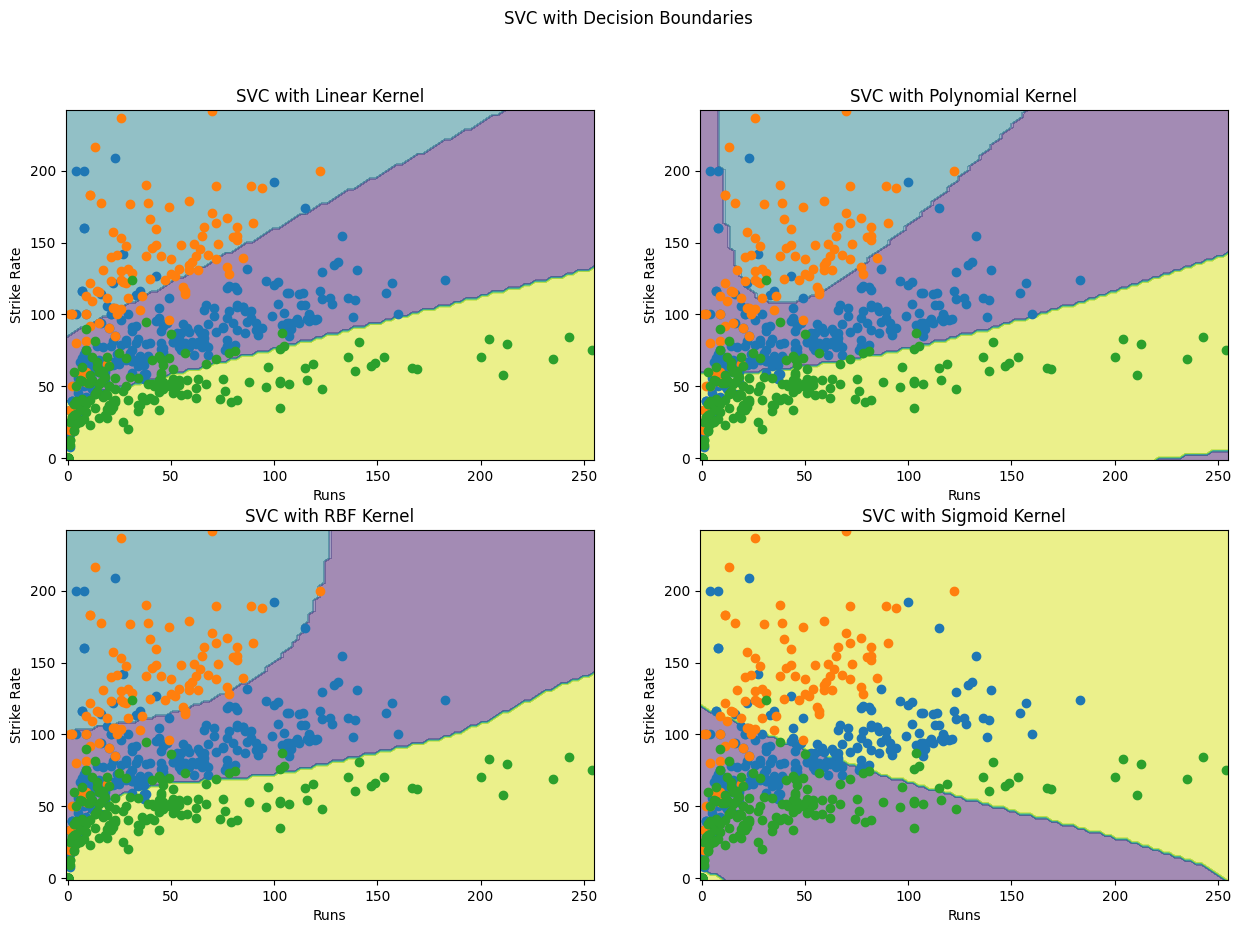

In [36]:
# Plot decision boundaries

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

svc_clf_list = list(svc_clfs.items())

k = 0
for r in range(2):
  for c in range(2):
    name, svc_clf = svc_clf_list[k]
    disp = DecisionBoundaryDisplay.from_estimator(svc_clf, x_train, response_method= 'predict', xlabel = 'Runs', ylabel = 'Strike Rate', alpha=0.5, ax = axes[r][c])
    for match_type in data_cricketer['match_type'].unique():
        subset_type = data_cricketer[data_cricketer['match_type'] == match_type]
        axes[r][c].scatter(subset_type['Runs'], subset_type['SR'], label = match_type)
    axes[r][c].set_title(f'SVC with {name} Kernel')
    k += 1

#fig.set_xlabel('Runs')
#fig.set_ylabel('Score Rate')
plt.suptitle('SVC with Decision Boundaries')
plt.show()

## Fit a SVM classification model with a Polynomial kernel with degree 6.

In [37]:
clf = SVC(kernel = 'poly', degree = 6)

In [38]:
clf.fit(x_train, y_train)

SVC(degree=6, kernel='poly')

In [39]:
y_pred = clf.predict(x_test)

In [40]:
y_pred

array(['TEST', 'TEST', 'TEST', 'ODI', 'TEST', 'TEST', 'T20', 'ODI',
       'TEST', 'ODI', 'ODI', 'T20', 'TEST', 'T20', 'TEST', 'TEST', 'ODI',
       'ODI', 'TEST', 'TEST', 'T20', 'ODI', 'ODI', 'ODI', 'ODI', 'ODI',
       'ODI', 'TEST', 'TEST', 'ODI', 'T20', 'ODI', 'TEST', 'ODI', 'TEST',
       'ODI', 'TEST', 'TEST', 'ODI', 'ODI', 'TEST', 'TEST', 'ODI', 'T20',
       'ODI', 'ODI', 'ODI', 'TEST', 'ODI', 'ODI', 'ODI', 'TEST', 'T20',
       'ODI', 'TEST', 'ODI', 'ODI', 'ODI', 'ODI', 'TEST', 'TEST', 'TEST',
       'TEST', 'T20', 'TEST', 'ODI', 'TEST', 'TEST', 'T20', 'TEST', 'ODI',
       'TEST', 'TEST', 'ODI', 'TEST', 'ODI', 'ODI', 'T20', 'TEST', 'TEST',
       'TEST', 'ODI', 'TEST', 'TEST', 'ODI', 'TEST', 'TEST', 'T20', 'ODI',
       'TEST', 'TEST', 'TEST', 'TEST', 'TEST', 'TEST', 'TEST', 'TEST',
       'ODI', 'T20', 'TEST', 'T20', 'TEST', 'T20', 'ODI', 'TEST', 'TEST',
       'TEST', 'ODI', 'ODI', 'T20', 'ODI', 'ODI', 'TEST', 'TEST', 'ODI',
       'TEST', 'ODI', 'T20', 'TEST', 'TEST', 'ODI

<Figure size 1000x600 with 0 Axes>

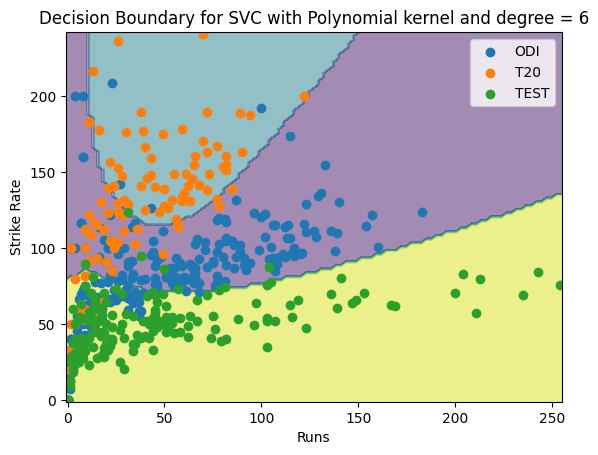

In [41]:
plt.figure(figsize=(10, 6))
disp = DecisionBoundaryDisplay.from_estimator(clf, x_train, response_method= 'predict', xlabel = 'Runs', ylabel = 'Strike Rate', alpha=0.5,)
for match_type in data_cricketer['match_type'].unique():
    subset_type = data_cricketer[data_cricketer['match_type'] == match_type]
    plt.scatter(subset_type['Runs'], subset_type['SR'], label = match_type)
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.title('Decision Boundary for SVC with Polynomial kernel and degree = 6')
plt.legend()

## For this model, compute confusion matrix, accuracy and balanced accuracy

In [42]:
unique_labels = list(set(y_pred))
unique_labels.sort()
unique_labels_ser = pd.Series(unique_labels)
unique_labels_ser

0     ODI
1     T20
2    TEST
dtype: object

In [43]:
# To compute the confusion matrix

confusion_mat = confusion_matrix(y_test, y_pred)                 # Index = Actual;  Column = Predicted
pd.DataFrame(confusion_mat, index = unique_labels_ser, columns = unique_labels_ser)

,ODI,T20,TEST
ODI,48,2,23
T20,13,17,3
TEST,1,0,53


In [44]:
# To compute accuracy score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7375

In [45]:
# To compute balanced accuracy score

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
balanced_accuracy

0.718055747736113

# Plot confusion matrix

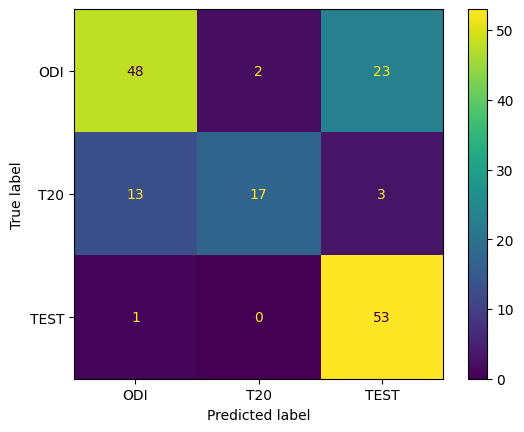

In [46]:
conf_disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = unique_labels_ser)
conf_disp.plot()

## Also print classification report

In [47]:
print(classification_report(y_test, y_pred, target_names = unique_labels_ser))

              precision    recall  f1-score   support

         ODI       0.77      0.66      0.71        73
         T20       0.89      0.52      0.65        33
        TEST       0.67      0.98      0.80        54

    accuracy                           0.74       160
   macro avg       0.78      0.72      0.72       160
weighted avg       0.76      0.74      0.73       160



## Create a scatter plot for Runs scored on x-axis and strike rate on y-axis. Group each point by match type (by assigning a different colour for each match type on the plot)

In [48]:
fig = px.scatter(data_cricketer, x = 'Runs', y = 'SR', color = 'match_type', title = 'Runs scored V/S Strike rate')
fig.show()
fig.write_image('Runs scored vs Strike rate.png')